# convolution-kernels

This is a Python module that implements kernels/filters methods for time series analysis. Kernels are defined as a linear combination of basis functions.

## Example
### Define a kernel basis from a Python function

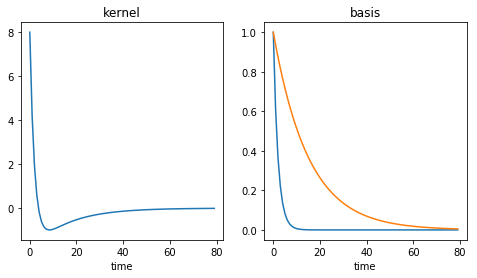

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from kernel.fun import KernelFun
from kernel.rect import KernelRect

def exponential_basis(t, tau):
    return np.exp(-t / tau)

ker = KernelFun(exponential_basis, basis_kwargs=dict(tau=[2, 15]), support=[0, 80], coefs=[10, -2])

t_support = np.arange(0, 80, 1)
y = ker.interpolate(t_support)
basis = ker.interpolate_basis(t_support)

fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2)
ax1.plot(t_support, y, '-')
ax2.plot(t_support, basis, '-')

ax1.set_title('kernel')
ax2.set_title('basis')

for ax in [ax1, ax2]:
    ax.set_xlabel('time')

### Convolve the kernel with a time series

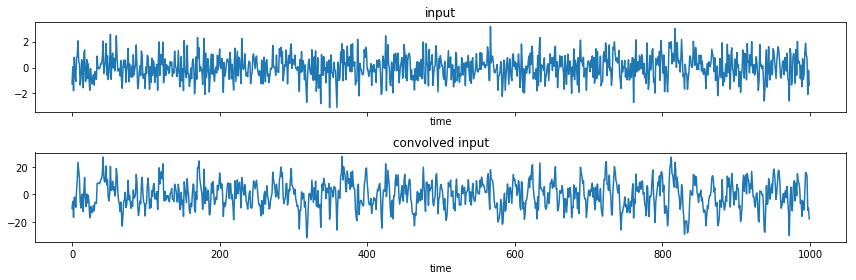

In [21]:
t = np.arange(0, 1000, 1)
input = np.random.randn(len(t))

output_convolution = ker.convolve_continuous(t, input)

fig, (ax1, ax2) = plt.subplots(figsize=(12, 4), sharex=True, nrows=2)
ax1.plot(t, input)
ax2.plot(t, output_convolution)

ax1.set_title('input')
ax2.set_title('convolved input')

for ax in [ax1, ax2]:
    ax.set_xlabel('time')
    
fig.tight_layout()

### Define a basis and get its coefficients given an input and output signal by least squares

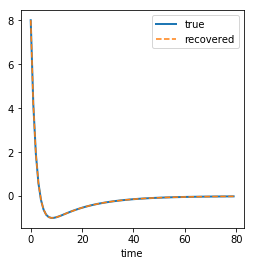

In [22]:
ker_fit = KernelFun(exponential_basis, basis_kwargs=dict(tau=[2, 15]), support=[0, 80])

ker_fit.fit(t, input, output_convolution)

y_fit = ker_fit.interpolate(t_support)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(t_support, y, '-', lw=2, label='true')
ax.plot(t_support, y_fit, '--', label='recovered')
ax.set_xlabel('time')
ax.legend()